In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from datetime import datetime, timedelta, timezone
from scipy.interpolate import interp1d, splrep, splev
from datetime import timezone
from numba import njit
sys.path.append('/home/manu/TFG_repo/scripts')

In [12]:
from config import data_dir
from analysis_routines import * 
from ploting_routines import *
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [13]:
def compare_fit(df_1, df_2, temp, pres, loc):
    
    temp = if_masked_to_array(temp[loc])
    pres = if_masked_to_array(pres[loc])
    zz = np.linspace(0, pres[-1] + 5, 300)    
    
    fig, ax = plt.subplots(figsize=(4, 4.6875))
    ax.scatter(temp, pres, marker='o', fc='None', ec='tab:red', s=22)
    ax.axhline(df_1.iloc[loc, 3], c='grey', ls='--', label='MLD ref') # plot MLD
    ax.axhline(df_2.iloc[loc, 3], c='grey', ls=':', label='MLD ref new tol') # plot MLD
    ax.set_ylim(pres[-1] + 10, 0)
    ax.set_xlim(9.5, 18)
    ax.plot(fit_function(zz, df_1, loc), zz, ls='--', label='ref')
    ax.plot(fit_function(zz, df_2, loc), zz, label='ref new tol')
    ax.set_xlabel('Temperature (ºC)')
    ax.set_ylabel('Depth (mb)')
    ax.set_title(df_1['Dates'].iloc[loc])
    ax.legend()
    fig.tight_layout()
    plt.show()

In [14]:
temp, pres, date = load_time_series('test/test_1.nc')
df_1 = load_SHDR_fit('SHDR_trials/test_int_good_tol.csv')
df_2 = load_SHDR_fit('SHDR_trials/test_int.csv')
df_3 = load_SHDR_fit('SHDR_trials/test_no_int.csv')
df_wint = load_SHDR_fit('SHDR_trials/test_winter_int.csv')
df_4 = load_SHDR_fit('SHDR_trials/test_winter_int_more2.csv')
df_5 = load_SHDR_fit('SHDR_trials/test_int_more2.csv')
df_6 = load_SHDR_fit('SHDR_trials/test_int_linspaced.csv')
df_7 = load_SHDR_fit('SHDR_trials/test_int_linspaced_no_c.csv')
df_8 = load_SHDR_fit('SHDR_trials/test_1_ref_cont_07_1.3_06_07.csv')
df_9 = load_SHDR_fit('SHDR_trials/test_1_ref.csv')
df_10 = load_SHDR_fit('SHDR_trials/test_int_lins_low_b3.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/manu/TFG_repo/data/SHDR_fit/SHDR_trials/test_int_good_tol.csv'

In [94]:
def interpolate(z, y, z_values):
    
    if isinstance(z, np.ma.core.MaskedArray):
        z = np.asarray(z[z.mask==False])
        y = np.asarray(y[y.mask==False])

    if len(z) != len(np.unique(z)):
        idx = np.argmin((z[1:] - z[:-1])) + 1
        z = np.delete(z, idx)
        y = np.delete(y, idx)
         

    interp = interp1d(z, y, 'cubic')
    idx = np.searchsorted(z, z_values)
    y = interp(z_values)
    z = z_values
    return z, y

z_values = [13, 18, 38, 48, 58, 68, 73, 84, 90, 102, 114, 120, 131, 136, 141, 146, 156, 161, 166, 171]
z_values = np.linspace(1, 175, 300)

def find_MLD_directly(temp, pres):
    MLD = []
    for i in range(len(temp)):
        pres_loc, temp_loc = interpolate(pres[i], temp[i], z_values)
        dif = temp_loc[0] - temp_loc
        a = np.searchsorted(dif, 0.5)
        MLD.append(pres_loc[a])
    return MLD



A = find_MLD_directly(temp_wint[:], pres_wint[:])
MLD = df_wint['D1'].to_numpy()
value = 10
locs = np.where(abs(MLD - A) > value)[0]
print(len(locs)/len(MLD))

1.0


In [47]:
print(distance(df_1, 'D1', 1, 10)[1])
print(distance(df_2, 'D1', 1, 10)[1])
print(distance(df_3, 'D1', 1, 10)[1])
print(distance(df_6, 'D1', 1, 10)[1])
print(distance(df_10, 'D1', 1, 10)[1])
print(distance(df_9, 'D1', 1, 10)[1])
print(distance(df_7, 'D1', 1, 10)[1])
locs, ratio = distance(df_3, 'D1', 1, 10)
print(ratio)

0.0
0.0
0.003112356053532524
0.0008558979147214441
0.11048863990040461
0.23093681917211328
0.10947712418300654
0.003112356053532524


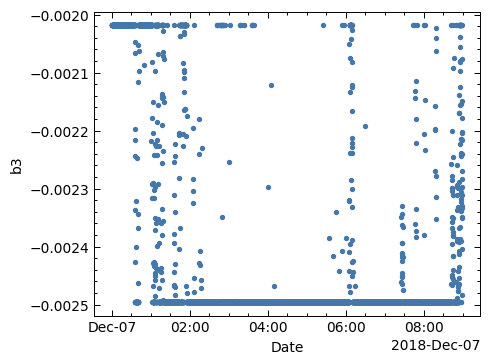

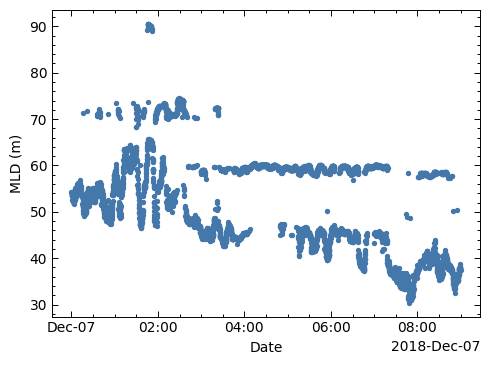

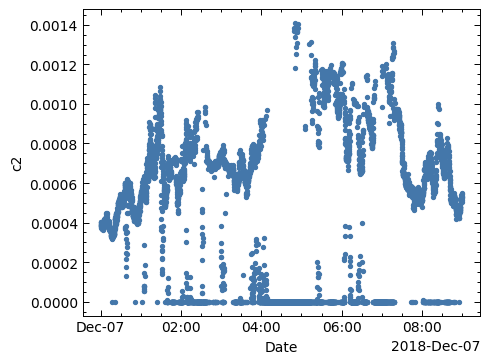

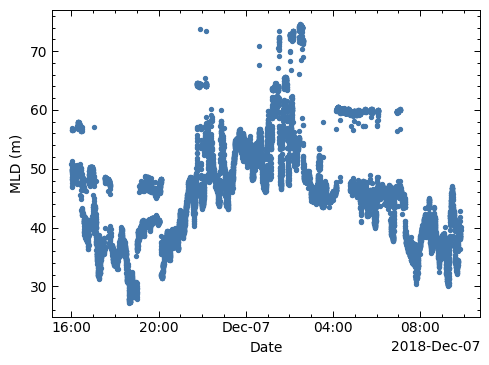

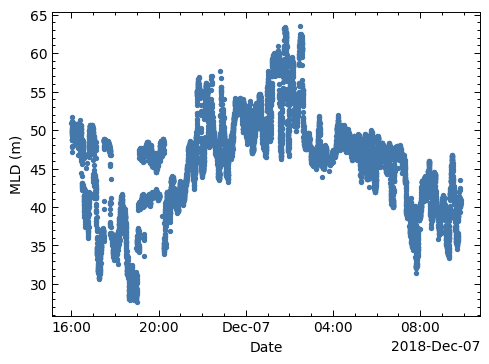

In [44]:
date1 = datetime(2018, 12, 7, 0)
date2 = datetime(2018, 12, 7, 9)
plot_fit_variable(df_10, 'b3', lims=(date1, date2))
plot_fit_variable(df_10, 'D1', lims=(date1, date2))
plot_fit_variable(df_10, 'c2', lims=(date1, date2))
plot_fit_variable(df_8, 'D1')
plot_fit_variable(df_1, 'D1')


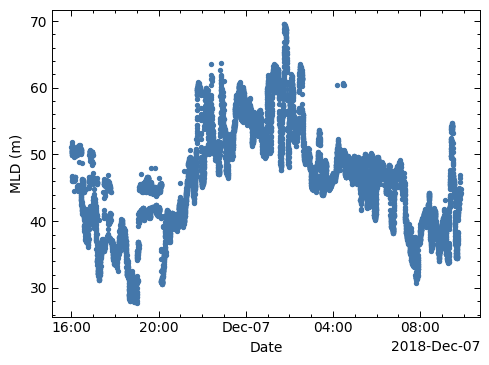

In [12]:
plot_fit_variable(df_6, 'D1')

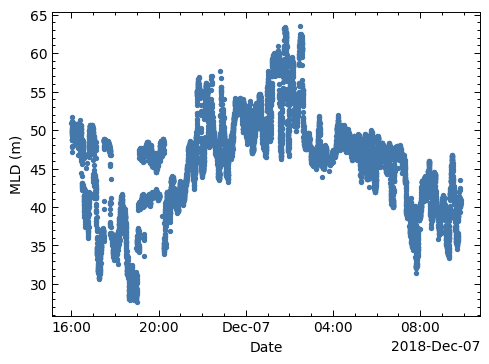

In [41]:
plot_fit_variable(df_1, 'D1')

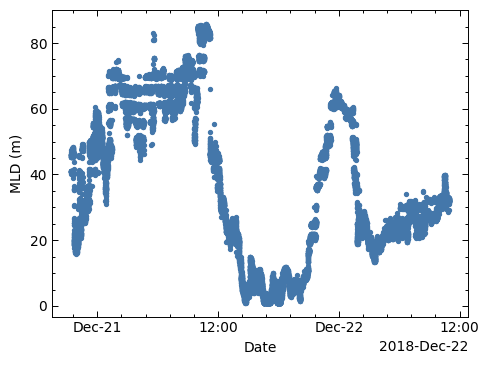

In [42]:
plot_fit_variable(df_wint, 'D1')

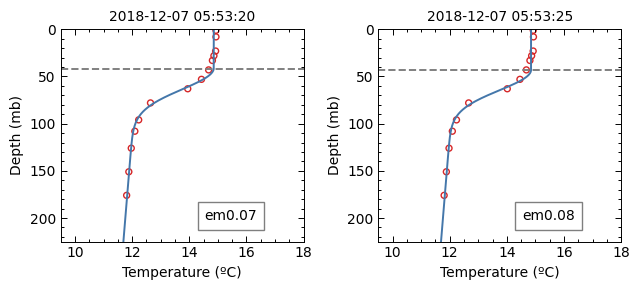

In [14]:
plot_multiple_profiles(df_6, temp, pres, [10000, 10000 +1])

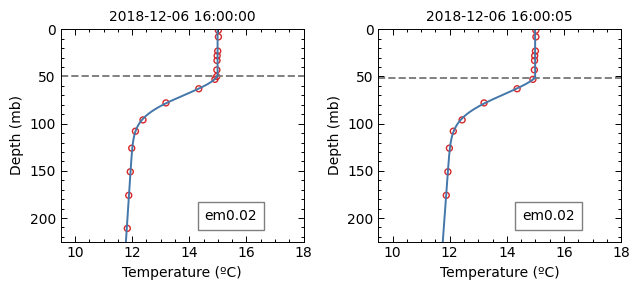

In [27]:
plot_multiple_profiles(df_7, temp, pres, [0, +1])

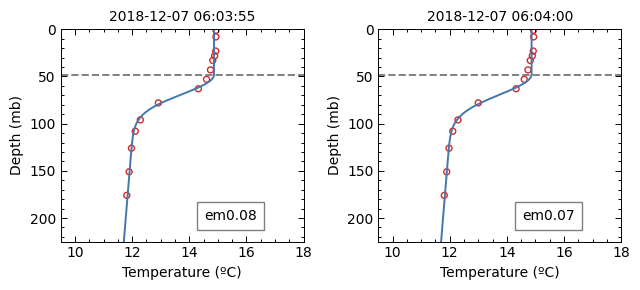

In [15]:
plot_multiple_profiles(df_1, temp, pres, [locs[-1], locs[-1] +1])

In [45]:
print(pres[0])
print(temp[0])

[1 8 23 28 33 43 50 53 63 78 96 108 126 151 176 211]
[15.0137 15.0175 14.9929 14.9734 14.9681 14.9627 14.9575 14.8953 14.3304
 13.1805 12.3774 12.113 11.9836 11.9327 11.8794 11.8287]


In [91]:
temp_wint, pres_wint, date_wint = load_time_series('test/test_winter.nc')

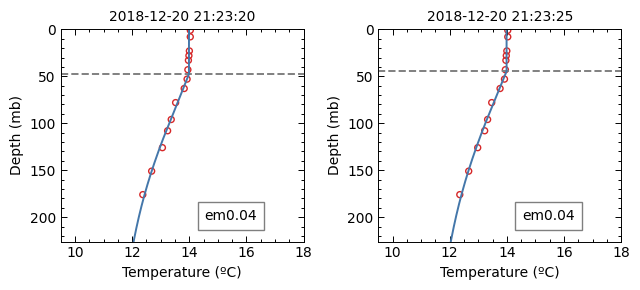

In [149]:
plot_multiple_profiles(df_4, temp_wint, pres_wint, [0, 1])

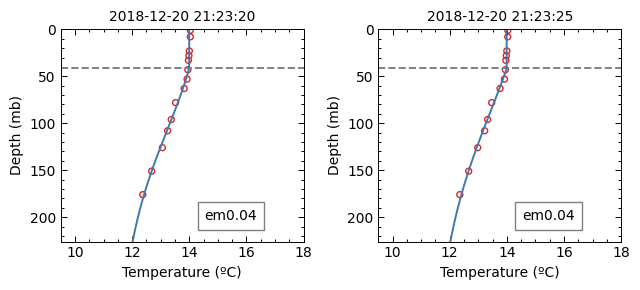

In [172]:
plot_multiple_profiles(df_4, temp_wint, pres_wint, [0, 1])

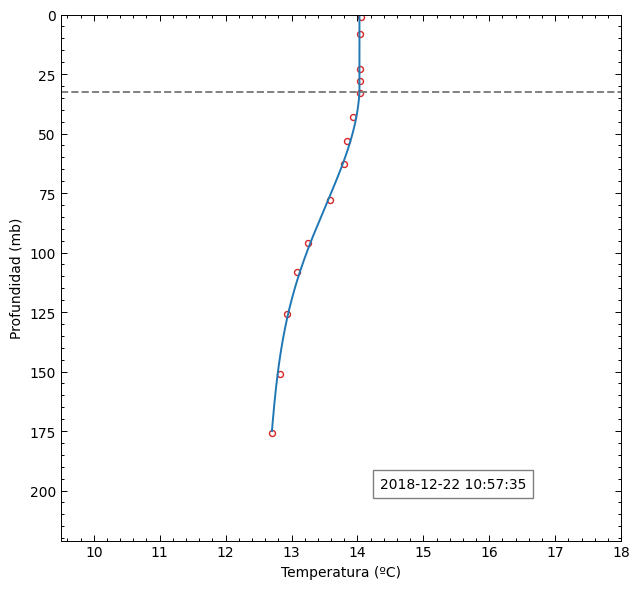

In [47]:
animate_profile_evolution(df_wint, temp_wint, pres_wint, 0, len(df_wint) - 1, 250, 'ola.mp4')

### Tests interpolations

In [195]:
def interpolate(z, y, z_values):
    
    if isinstance(z, np.ma.core.MaskedArray):
        z = np.asarray(z[z.mask==False])
        y = np.asarray(y[y.mask==False])

    if len(z) != len(np.unique(z)):
        idx = np.argmin((z[1:] - z[:-1])) + 1
        z = np.delete(z, idx)
        y = np.delete(y, idx)
         

    interp = interp1d(z, y, 'linear')
    y_int = np.asarray(interp(z_values))
    #idx = np.searchsorted(z, z_values)
    #z = np.insert(z, idx, z_values)
    #y = np.insert(y, idx, interp(z_values))
    return y_int

def interpolate2(z, y, z_values):
    if isinstance(z, np.ma.core.MaskedArray):
        z = np.asarray(z[z.mask==False])
        y = np.asarray(y[y.mask==False])

    if len(z) != len(np.unique(z)):
        idx = np.argmin((z[1:] - z[:-1])) + 1
        z = np.delete(z, idx)
        y = np.delete(y, idx)
        
    interpolator = splrep(z, y)
    y_int = splev(z_values, interpolator, der=0)
    return y_int
    
        
def compare_interpolation(df_fit, temp, pres, loc, z_int):
    temp_loc = if_masked_to_array(temp[loc])
    pres_loc = if_masked_to_array(pres[loc])
    zz = np.linspace(0, max(pres_loc))
    
    fig, ax = plt.subplots(figsize=(4, 4.6875))
    ax.scatter(temp_loc, pres_loc, marker='o', fc='None', ec='tab:red', s=22)
    ax.scatter(interpolate(z_int), z_int, marker='x')
    ax.plot(fit_function(zz, df, loc), zz)
    ax.set_ylim(z[-1] + 10, 0)
    ax.set_xlim(9.5, 18)
    ax.set_xlabel('Temperature (ºC)')
    ax.set_ylabel('Depth (mb)')
    fig.tight_layout()
    plt.show()
    
    
    

In [76]:
#z_values = [13, 18, 38, 58, 68, 73, 87]

In [165]:
def plot_interpolation(z, y, z_int, y_int):
    if isinstance(z, np.ma.core.MaskedArray):
        z = np.asarray(z[z.mask==False])
        y = np.asarray(y[y.mask==False])

    fig, ax = plt.subplots(figsize=(4, 4.6875))
    ax.scatter(y, z, marker='o', fc='None', ec='tab:blue', s=22)
    ax.scatter(y_int, z_int, marker='x')
    #ax.plot(y_int, z_int)
    ax.set_ylim(z[-1] + 10, 0)
    ax.set_xlim(9.5, 18)
    ax.set_xlabel('Temperature (ºC)')
    ax.set_ylabel('Depth (mb)')
    fig.tight_layout()
    plt.show()

In [196]:
n = 10000
y, z = temp[n], pres[n]
z_int_more = np.array([13, 18, 25.5, 36, 39, 46, 56.3, 59.6, 68, 73, 82, 89])
y_int_more = interpolate(z, y, z_int_more)

z_int_more2 = np.array([13, 18, 25.5, 36, 39, 46, 56.3, 59.6, 68, 73, 82, 89, 102, 117, 139.5, 163.5])
y_int_more2 = interpolate(z, y, z_int_more2)

z_int_good = [13, 18, 38, 48, 58, 68, 73, 84, 90, 102, 114, 120, 131, 136, 141, 146, 156, 161, 166, 171]
y_int_good = interpolate(z, y, z_int_good)

In [174]:
#z = np.asarray(z[z.mask==False])
#print(z)
#print(z[1:] - z[:-1])

[  1   8  23  28  33  43  53  63  78  96 108 126 151 176]
[ 7 15  5  5 10 10 10 15 18 12 18 25 25]


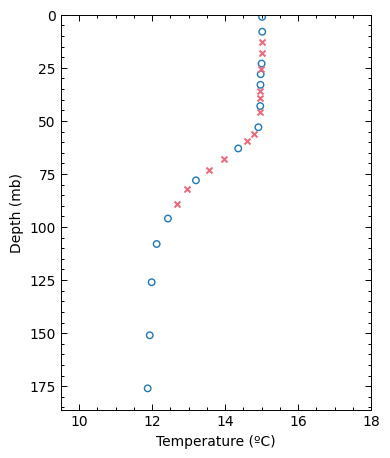

In [153]:
plot_interpolation(z, y, z_int_more, y_int_more)

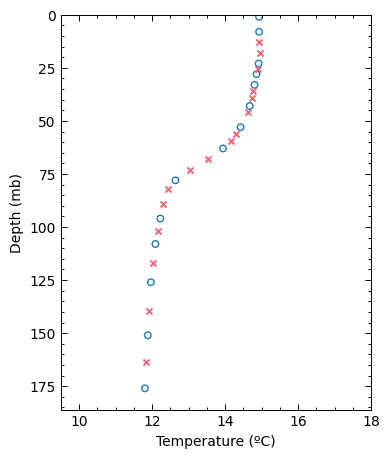

In [184]:
plot_interpolation(z, y, z_int_more2, y_int_more2)

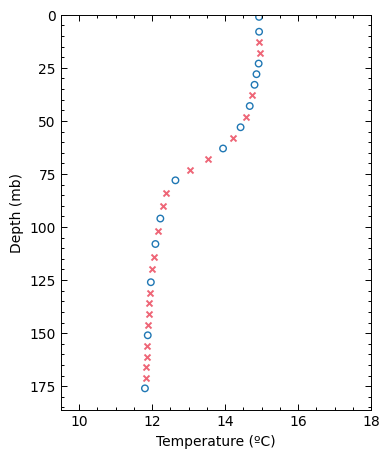

In [185]:
plot_interpolation(z, y, z_int_good, y_int_good)

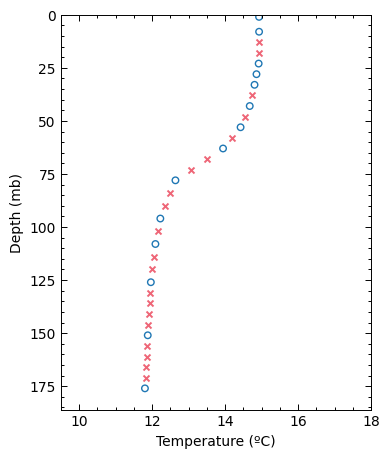

In [197]:
plot_interpolation(z, y, z_int_good, y_int_good)

### LAST TESTS BEFORE SENDING TO SERVER

In [55]:
df_c = load_SHDR_fit('SHDR_trials/test_1_temporary_final_c.csv')
df_ci = load_SHDR_fit('SHDR_trials/test_1_temporary_final_ci.csv')
df_cistd = load_SHDR_fit('SHDR_trials/test_1_temporary_final_cistd.csv')
df_citol = load_SHDR_fit('SHDR_trials/test_1_temporary_final_citol.csv')
df_cid = load_SHDR_fit('SHDR_trials/test_1_temporary_final_cid.csv')
df_cilin = load_SHDR_fit('SHDR_trials/test_1_temporary_final_cilin.csv')

In [56]:
print(mean_and_std(df_c, 'em'))
print(mean_and_std(df_ci, 'em'))
print(mean_and_std(df_cistd, 'em'))
print(mean_and_std(df_citol, 'em'))
print(mean_and_std(df_cid, 'em'))
print(mean_and_std(df_cilin, 'em'))

(0.0741760583906504, 0.026536999396288636)
(0.070187774265727, 0.026175468681135874)
(0.06972709408294589, 0.026086473439061064)
(0.07018521742213522, 0.026173331978278595)
(0.07018188862885706, 0.026173872928026025)
(0.06342031763578686, 0.02195626008568562)


Delta coding no mejora significantemente el ajuste, no merece la pena.
Lo mismo con bajar el tol a 1e-5
Permitir variaciones en b3 si bajan el ajuste, pero en un poco ficticio porque el algoritmo usa b3 segun le conviene sin tener ningún sentido físico. No merece la pena, se fija a la media

In [54]:
print(max(df_citol['em'] - df_ci['em']))

0.010901559392180599


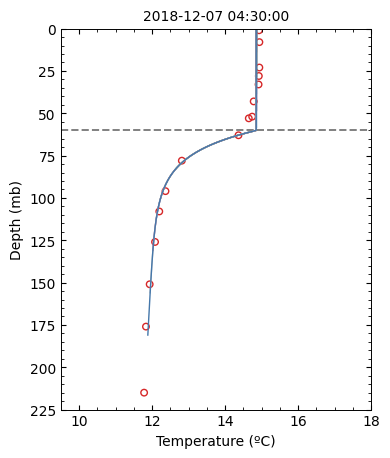

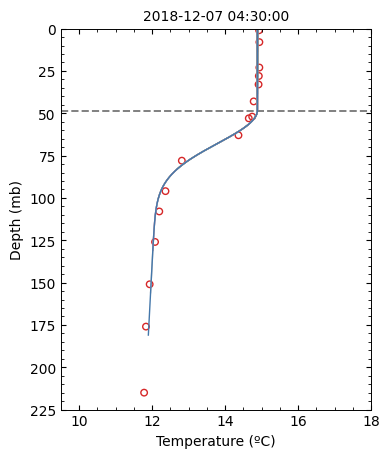

In [47]:
plot_profile_fit(df_c, temp, pres, 9000)
plot_profile_fit(df_ci, temp, pres, 9000)

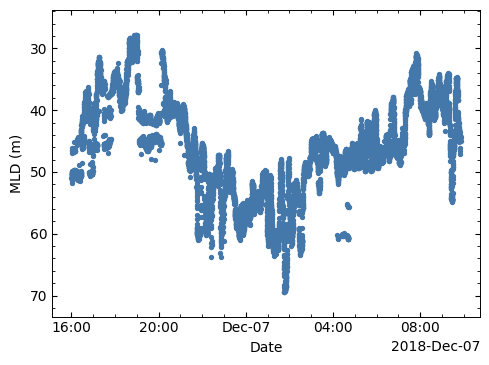

In [72]:
plot_fit_variable(df_ci, 'D1')

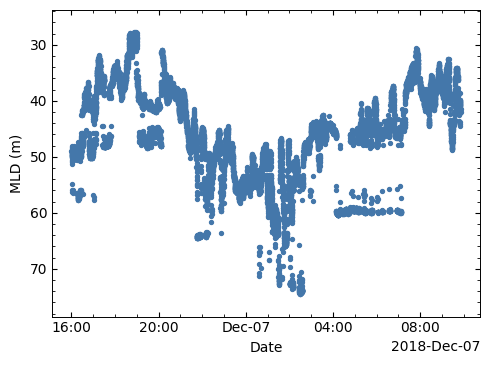

In [71]:
plot_fit_variable(df_c, 'D1')

In [75]:
physical_RMS_cilin = [physical_RMS(df_cilin, temp, pres, i) for i in range(len(date))]
physical_RMS_ci = [physical_RMS(df_ci, temp, pres, i) for i in range(len(date))]

In [74]:
loc = np.where(physical_RMS_ci > df_c['em'])[0]
print(len(loc)/len(date))

0.9725334578275755


### Cubic interpolation is better than linear

# Winter

In [79]:
dfw_c = load_SHDR_fit('SHDR_trials/test_w_temporary_final_c.csv')
dfw_ci = load_SHDR_fit('SHDR_trials/test_w_temporary_final_ci.csv')
dfw_cistd = load_SHDR_fit('SHDR_trials/test_w_temporary_final_cistd.csv')
dfw_citol = load_SHDR_fit('SHDR_trials/test_w_temporary_final_citol.csv')

In [81]:
print(mean_and_std(dfw_c, 'D1'))
print(mean_and_std(dfw_ci, 'D1'))
print(mean_and_std(dfw_cistd, 'D1'))
print(mean_and_std(dfw_citol, 'D1'))

(37.24404383524661, 22.86582562736406)
(38.33075235993829, 22.809981580096167)
(38.320621408240754, 22.799470936254504)
(38.170002533881174, 22.91227943372503)


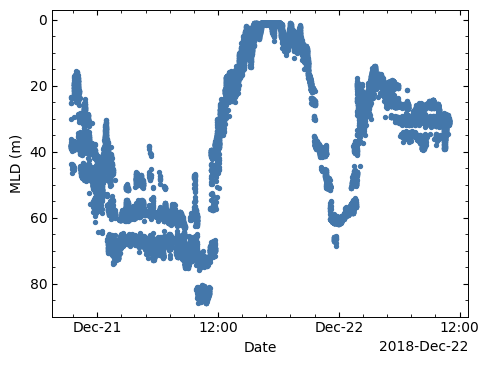

In [82]:
plot_fit_variable(dfw_c, 'D1')

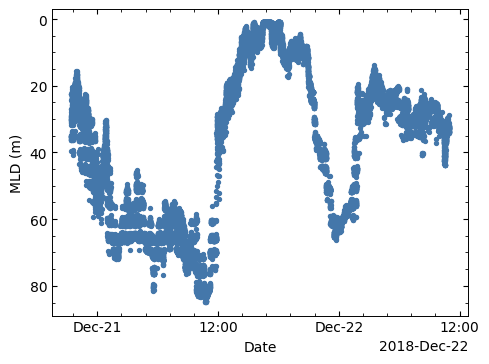

In [84]:
plot_fit_variable(dfw_ci, 'D1')

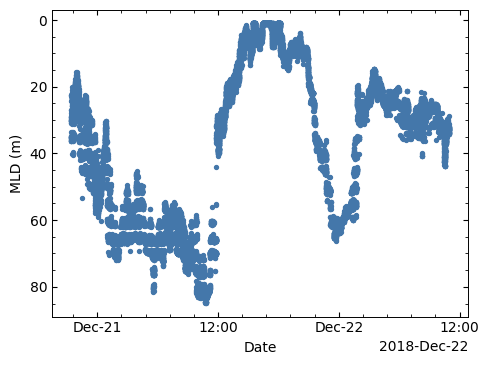

In [86]:
plot_fit_variable(dfw_citol, 'D1')

### Conclusiones:
Se correra el algoritmo sobre la serie de verano de tres maneras. Sin interpolación ni continuidad, con continuidad, con interpolacion y continuidad.
